# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [75]:
# Libraries
import pandas as pd
import numpy as np

# Challenge 1

Download the `employees` dataset from [here](https://drive.google.com/file/d/1qiyQHmmntBsGHjlLSoSh9-t_R4UXOg_H/view?usp=sharing) and place it in the data folder

Load and save your dataset in a variable called `employees`.

In [76]:
# your code here
employees = pd.read_csv('../data/employee.csv')
employees.sample(2)

,Name,Department,Education,Gender,Title,Years,Salary
3,Sonia,HR,Bachelor,F,analyst,4,35
5,Eva,Sales,Bachelor,F,associate,2,55


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [77]:
# Method 1
# your code here
employees.groupby('Department')[['Salary']].mean()

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [78]:
# Method 2
# your code here
employees.pivot_table('Salary', 'Department', aggfunc = 'mean')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [79]:
# your code here
employees.pivot_table('Salary', 'Department', 'Title', aggfunc = 'mean')

Title,VP,analyst,associate
Department,,,
HR,70.0,32.5,NaN
IT,70.0,32.5,60.0
Sales,NaN,NaN,55.0


#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [80]:
# your code here

employees.pivot_table(values = 'Salary', index =['Department', 'Title'], columns = 'Years', aggfunc = 'mean').T

Department    HR            IT                       Sales
Title         VP analyst    VP analyst associate associate
Years                                                     
1            NaN     NaN   NaN    35.0       NaN       NaN
2            NaN    30.0   NaN    30.0       NaN      55.0
3            NaN     NaN   NaN     NaN       NaN      55.0
4            NaN    35.0   NaN     NaN       NaN       NaN
7            NaN     NaN   NaN     NaN      60.0       NaN
8           70.0     NaN  70.0     NaN       NaN       NaN

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [81]:
# your code here|
df1 = employees.pivot_table(values = 'Salary', index ='Department', columns ='Title', aggfunc='mean')
df2 = employees.pivot_table(values = 'Salary', index = 'Department', columns='Title', aggfunc= 'count')
#pd.concat((df1, df2), axis=0)

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [82]:
# your code here
df3 = employees.groupby('Department', 'Title')[['Salary']].mean()
df3

ValueError: No axis named Title for object type <class 'pandas.core.frame.DataFrame'>

In [83]:
"""
your commments here
"""

'\nyour commments here\n'

#### Based on your comments, fill the missing values with an appropriate value.

In [ ]:
# your code here

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [ ]:
# your code here

#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [ ]:
# your code here

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [ ]:
# your code here

# Challenge 2

Read the `fitbit` dataset from
[here](https://drive.google.com/file/d/1V3A0sRLmAb6BDFoZBIrjUOMl5Ap9wSts/view?usp=sharing) and place it in the data folder


Save your data in a variable called `fitbit`.

In [84]:
# your code here
fitbit = pd.read_csv('../data/Fitbit.csv')
fitbit.sample(3)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
281,12-02-2016,2816,8353,6.21,19,732.0,219,17,26,1187,322,26,14,348
5,13-05-2015,276,779,5.79,15,726.0,172,34,18,1094,405,47,31,457
209,03-12-2015,3165,10784,8.04,14,774.0,201,25,68,16,404,43,32,448


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [86]:
# your code here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [90]:
# your code here
df = fitbit[['Minutes Very Active', 'Steps']]
df.corr()

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [91]:
import matplotlib.pyplot as plt;

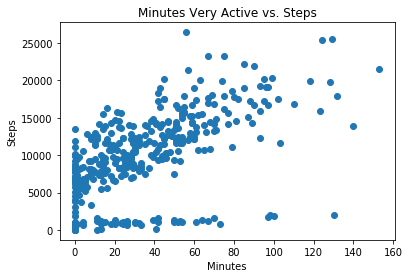

In [92]:
x = df['Minutes Very Active']
y = df['Steps']
plt.scatter(x, y)
plt.title('Minutes Very Active vs. Steps')
plt.xlabel('Minutes')
plt.ylabel('Steps')
plt.show()


#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
your commments here
"""
#There is moderate positive correlation between Minutes Very Active and Steps taken

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [93]:
# your code here
df2 = fitbit[['Minutes Sedentary', 'Steps']]
df2.corr()

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

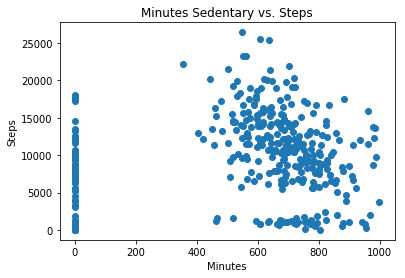

In [95]:
# your code here

x = fitbit['Minutes Sedentary']
y = fitbit['Steps']
plt.scatter(x, y)
plt.title('Minutes Sedentary vs. Steps')
plt.xlabel('Minutes')
plt.ylabel('Steps')
plt.show()

In [96]:
"""
your commments here
"""
#No real correlation

'\nyour commments here\n'

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [97]:
# your code here
df3 = fitbit[['MinutesOfSleep', 'Steps']]
df3.corr()

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

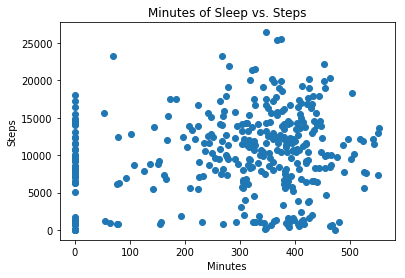

In [100]:
# your code here

x = fitbit['MinutesOfSleep']
y = fitbit['Steps']
plt.scatter(x, y)
plt.title('Minutes of Sleep vs. Steps')
plt.xlabel('Minutes')
plt.ylabel('Steps')
plt.show()

In [ ]:
"""
your commments here
"""
#No correlation

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [101]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [105]:
# your code here
cor_fit = fitbit[columns]
cor_fit.sample(3)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
13,3228,16291,18,616.000,52,351
348,3596,17232,17,1.002,88,0
278,2872,10457,14,847.000,41,342


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [116]:
# your code here
cor_fit.corr().sort_values(['Steps'], ascending = False)

#Minutes very active are the most highly correlated with Steps

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


# Challenge 3

Read the `time_grades` dataset from 
[here](https://drive.google.com/file/d/1zKAqZPjLnU96cvfMzqfFz-hH6YxCNVKN/view?usp=sharing) and place it in the data folder


Save your data in a variable called `time_grades`.

In [118]:
# your code here
time_grades = pd.read_csv('../data/Time_Grades.csv')
time_grades.sample(3)

,Name,Study time,Grade
9,Gervasio,7,3
11,Alicia,11,7
7,Pedro,6,5


#### Show visually the frequency distribution of the `time_grades` dataset.

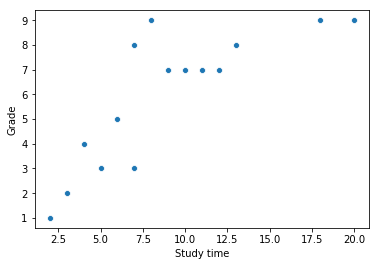

In [123]:
# your code here
import seaborn as sns
sns.scatterplot(x='Study time', y='Grade', data=time_grades)

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [128]:
# your code here
corr_1 = time_grades.corr(method='pearson')
corr_2 = time_grades.corr(method='spearman')

corr_1


,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [129]:
corr_2

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


In [ ]:
"""
your commments here
"""
#There is a positive correlation between Study time and grade using both Pearson and Spearman methods 

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

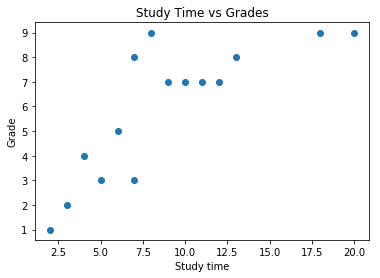

In [130]:
# your code here
x = time_grades['Study time']
y = time_grades['Grade']
plt.scatter(x, y)
plt.title('Study Time vs Grades')
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.show()

In [ ]:
"""
your commments here
"""
#Weak positive correlation between Study time and grade

#### Could you explain the difference between Pearson and Spearman correlations?

In [131]:
"""
your commments here
"""
#Pearson correlation measures linear relationship between points
#Spearman correlation acknowledges that relationship between points change together but not at the same rate

'\nyour commments here\n'